<a href="https://colab.research.google.com/github/cpalme28/MAT-421/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 6 - Coree Palmer

**3.2 - Continuity and Differentiation**

Limits
* They are essential to calculus and used to define continuity, derivatives, and integrals.
* Let f: D-> R be a real-valued function on D subset R^d. Then f is said to be continuous at a in D if lim x->a f(x) = f(a)
* Limits can be calculated by hand, but also with Python

In [3]:
from sympy import *

x = symbols('x')

expr = sin(x)/x;
limit_expr = limit(expr, x, 0)
print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

expr = cos(x)/x;
limit_expr = limit(expr, x, 0)
print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

expr = sin(6*x)/x;
limit_expr = limit(expr, x, 0)
print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

expr = cos(6*x)/x;
limit_expr = limit(expr, x, 0)
print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

Limit as sin(x)/x approaches 0 : 1
Limit as cos(x)/x approaches 0 : oo
Limit as sin(6*x)/x approaches 0 : 6
Limit as cos(6*x)/x approaches 0 : oo


Derivatives
* The derivative of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to another variable.
* The derivative of f at $x_0$ is f'($x_0$) = df($x_0$)/dx = lim h->0 [f($x_0$ + h) - f($x_0$)]/h, provided the limit exists.
* Derivatives can be calculated by hand, but also in Python.

In [11]:
x, y = symbols('x y')

func1 = x**2
print("Derivative of " + str(func1) + " with respect to x: " + str(func1.diff(x)))

func2 = x**3 + 3*x**2 + 6*x + 3
print("Derivative of " + str(func2) + " with respect to x: " + str(func2.diff(x)))

func3 = x**2 + y**2 + 2*x + y
print("Derivative of " + str(func3) + " with respect to x: " + str(func3.diff(x)))
print("Derivative of " + str(func3) + " with respect to x: " + str(func3.diff(y)))

Derivative of x**2 with respect to x: 2*x
Derivative of x**3 + 3*x**2 + 6*x + 3 with respect to x: 3*x**2 + 6*x + 6
Derivative of x**2 + 2*x + y**2 + y with respect to x: 2*x + 2
Derivative of x**2 + 2*x + y**2 + y with respect to x: 2*y + 1


Rolle's Theorem
* Let f:[a,b]->R be a continuous function and assume that its derivative exists on (a,b). If f(a) = f(b), then there is a < c < b such that f'(c) = 0.

Mean Value Theorem
* Let f:[a,b]->R be a continous function and assume that its derivative exists on (a,b). Then there is a < c < b such that f(b) = f(a) + (b-a)f'(c), or [f(b) - f(a)]/[b-a] = f'(c).
* This means that when a function is continuous, between two points, the instantaneous rate of change at some point is equivalent to the average rate of change across the points.

Example
* Consider the affine function f(x) = q^T x + r, where x = ($x_1$,...,$x_d$)^T, q = ($q_1$,...,$q_d$)^T in R^d. The partial derivatives of the linear term are given by the partial derivative with respect to $x_i$ of [q^T x] = $q_i$. So the gradient of f is q.

Directional Derivatives
* The directional derivative of f at $x_0$ in the direction v is lim h->0 [f($x_0$ + hv) - f($x_0$)]/h.
* Directional Derivative from Gradient
  * Assume that f is continously differentiable at $x_0$. Then the directional derivative of f at $x_0$ in the direction v is given by $J_f(x_0)v$ = gradient $f(x_0)^T v$.

Taylor's Theorem
* Taylor's Theorem gives an approximation of a differentiable function around a given point by a polynomial.
* It is a powerful generalization of the Mean Value Thorem that provides polynomial approximations to a function around a point.
* It is a way to write a function as an infinite sum of terms using derivatives.
* Suppose f has a m times continuous derivative on [a,b]. Then f(b) = f(a) + (b-a)f'(a) + 1/2 (b-a)^2 f''(a) + ... + [(b-a)^(m-1)/(m-1)!]f^(m-1)(a) + R_m, where R_m = (b-a)^m / m! f^(m) (a + theta (b-a)).

**3.3 - Unconstrained Optimization**

Global Minimizer
* Let f:R^d->R. The point x* in R^d is a global minimizer of f over R^d if f(x) >= f(x*), for all x in R^d.
* A point where a function reaches its lowest value compared to all other possible points.

Local Minimizer
* Let f: R^d->R. The point x* in R^d is a local minimizer of f over R^d if there is delta > 0 such that f(x) >= f(x*), for all x in B_delta(x*)/{x*}.
* If the inequality is strict, we say that x* is a strict local minimizer.
* A point where a function reaches its lowest value compared to all nearby values; not neccessarily the lowest value the function will reach.

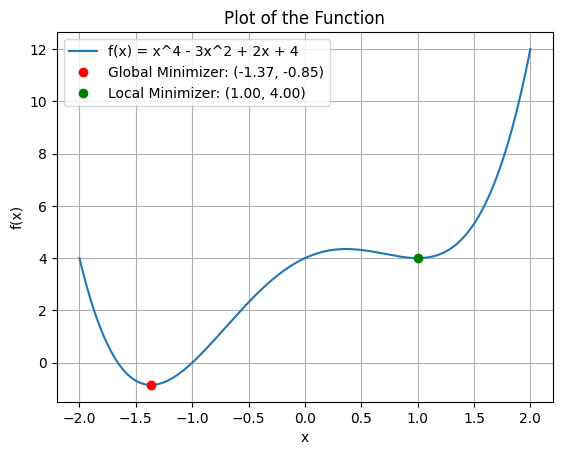

In [16]:
# optimization can be used to discover local and global minimizers in Python

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# define the function
def f(x):
  return x**4 - 3*x**2 + 2*x + 4

# generate values for plotting
x_values = np.linspace(-2, 2, 500)
y_values = f(x_values)

# plot
plt.plot(x_values, y_values, label='f(x) = x^4 - 3x^2 + 2x + 4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the Function')
plt.grid(True)
plt.legend()

# find global minimum using optimization
result_global = minimize(f, x0=0) # start from x = 0
x_global_min = result_global.x
y_global_min = result_global.fun

# plot global min
plt.plot(x_global_min, y_global_min, 'ro', label=f'Global Minimizer: ({x_global_min[0]:.2f}, {y_global_min:.2f})')

# find local minimum using optimization (from x = 2)
result_local = minimize(f, x0=2)
x_local_min = result_local.x
y_local_min = result_local.fun

# plot local min
plt.plot(x_local_min, y_local_min, 'go', label=f'Local Minimizer: ({x_local_min[0]:.2f}, {y_local_min:.2f})')
plt.legend()
plt.show()

Descent Direction
* Let f:R^d->R. A vector v is a descent direction for f at $x_0$ if there is alpha* > 0 such that f($x_0$ + alpha v) < f($x_0$), for all alpha in (0, alpha*).
* Descent Direction and Directional Derivative
  * Let f:R^d->R be continously differentiable $x_0$. A vector v is a descent directin for f at $x_0$ if gradient of $f(x_0)^T v < 0$.

First-Order Necessary Condition
* If $x_0$ is a local minimizer, then the gradient f($x_0$) = 0.  
* If f is twice continuously differentiable, the Hessian of the function can play an important role.
  * A square summetric dxd matrix H is a positive semi-definite (PSD) if x^T H x >= 0 for any x in R^d.

Second-Order Necessary Condition
* If $x_0$ is a local minimizer, then $H_f(x_0)$ is PSD

Convex Sets and Functions
* A set D subset of R^d is convex if for all x, y in D and all alpha in [0,1] (1 - alpha)x + alpha y in D.
* A function f:R^d->R is convex if, for all x, y in R^d and all alpha in [0,1], f((1 - alpha)x + alpha y) <= (1 - alpha)f(x) + alpha f(y).

Global Minimizers of Convex Functions
* For a convex function, sufficient (and therefore necessary) condition for minimizers is gradient f(x_0) = 0.
* Let f:R^d->R be a convex function. Then any local minimizer of f is also a global minimizer.

Gradient Descent
* Gradient descent is an iterativie optimization algorithm for finding a local minimum of a differentiable function.
* Example
  * Consider the least-squares problem min x in R^d ||Ax - b||^2, where A in R^(nxd) has full column rank. In particular, d <= n.
  * The objective function is a quadratic function f(x) = ||Ax-b||^2 = (Ax-b)^T (Ax-b) = x^T A^T Ax - 2b^T Ax + b^T b.
  * By a previous example, the gradient f(x) = 2A^T Ax - 2A^Tb, where we used that A^T A is symmetric. So the stationary points satisfy A^T Ax = A^T b, which you may recognize as the normal equations for the least-squares problem.
  * The Hessian of f is H_f(x) = 2A^T A. This Hessian is clearly PSD.
  * Any local minimizer, which is necessarily a stationary point, is also a global minimizer.


